In [32]:
# install these if you do not already have them
#pip install osmnx contextily --quiet

In [33]:
# pre-processing and mapping libraries
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx

In [34]:
# loading the data
pilgrim_paths = pd.read_csv("data/PilgrimPaths.csv", encoding="latin")
walled_towns_gdf = gpd.read_file("data/walled_towns/WalledTownsOfIreland.shp")

In [35]:
# check what columns are used
pilgrim_paths.columns

Index(['Object-ID', 'Feature Type', 'Area', 'Length', 'Projection System Used',
       'X Co-ord', 'Y Co-ord', 'Z Co-ord', 'Country', 'County',
       'Local Authority', 'Electoral Division', 'Townland', 'Dataset Name',
       'Object Type, Name or Title', 'Start Point', 'Length.1', 'Duration',
       'Level of Difficulty', 'Map', 'URL',
       'Contact Phone/Email (Sourced from existing publicly availably sources)',
       'Photo ID', 'Object Owner', 'Landowner', 'Data Source(Oral/Tangible)',
       'Commissioning Body', 'Survey Conducted by', 'Data Data Recorded',
       'Resource Purpose'],
      dtype='object')

In [36]:
# only keep necessary columns
pilgrim_paths = pilgrim_paths[['Feature Type', 'X Co-ord', 'Y Co-ord', 'County']]

In [37]:
# check the df
pilgrim_paths.head()

,Feature Type,X Co-ord,Y Co-ord,County
0,Pilgrim Walk,553160,884600,Donegal
1,Pilgrim Walk,555550,878100,Donegal
2,Pilgrim Walk,609000,873200,Donegal
3,Pilgrim Walk,515400,779340,Mayo
4,Pilgrim Walk,621000,730700,Offaly


In [38]:
walled_towns_gdf.columns

Index(['Feature_Id', 'Feature_Ty', 'Projection', 'X', 'Y', 'Country', 'County',
       'Local_Auth', 'Electoral_', 'Townland', 'Dataset_Na', 'Object_Typ',
       'Descriptio', 'Object_ID_', 'Category', 'Photo_ID', 'Photo_Sour',
       'Object_Own', 'Landowner', 'Data_Sourc', 'Commission', 'Survey_Con',
       'Data_Data_', 'Resource_P', 'Photo_ID_2', 'Photo_So_1', 'geometry'],
      dtype='object')

In [39]:
# only keep what we need
walled_towns_gdf = walled_towns_gdf[['Feature_Ty', 'X', 'Y', 'Townland', 'geometry']]

In [40]:
# check the gdf
walled_towns_gdf.head()

,Feature_Ty,X,Y,Townland,geometry
0,Walled Town,546930,646820,Adare,POINT (546930.096 646819.951)
1,Walled Town,696210,790690,"Cappocksgreen,Dawsonsdemesne,Townparks (Ardee ...",POINT (696209.853 790689.944)
2,Walled Town,671530,764200,"Town Parks,Bunboggan,Fostersfields",POINT (671529.723 764199.966)
3,Walled Town,550200,727780,Athenry,POINT (550199.912 727779.954)
4,Walled Town,603870,741520,"Golden Island,Loughnaskin,Athlone And Bigmeado...",POINT (603869.797 741519.974)


In [41]:
# change the crs for contextily
walled_towns_gdf = walled_towns_gdf.to_crs('EPSG:3857')

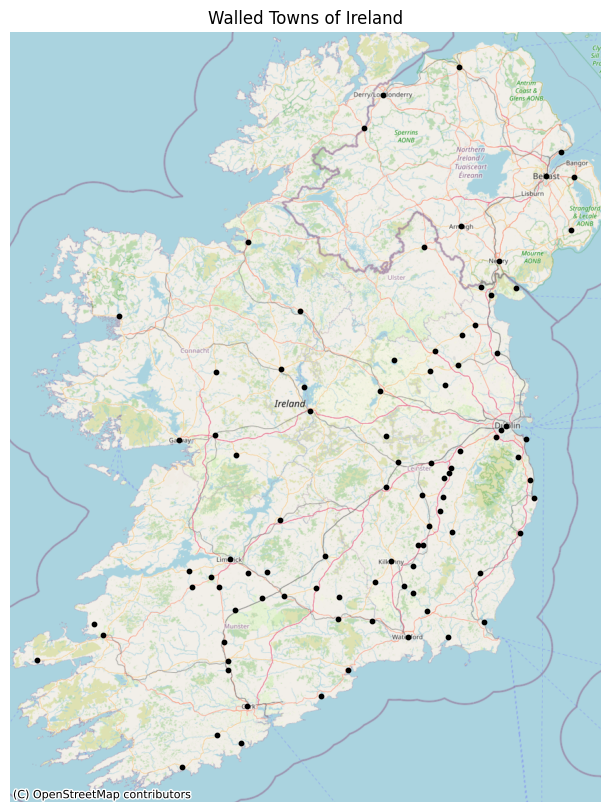

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))

walled_towns_gdf.plot(ax=ax, color='red', markersize=10)
# need to parse pilgrim paths before plotting

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)
#ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()
plt.title('Walled Towns of Ireland')

# show plot
plt.show()